<a href="https://colab.research.google.com/github/cml096/Basic-Project/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [2]:
list_drop = ['ID','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [3]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [4]:
df_palas = df[df.unit == 'Pala']

In [5]:
df_palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'start', 'crew', 'eqmtid',
       'logintime', 'locid', 'operid', 'totaltime', 'pit', 'unit',
       'totalloads', 'totaltons', 'loadtime', 'idletime', 'spottime',
       'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04',
       'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [6]:
df_palas.head()

,shiftdate,shiftindex,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
44,2019-07-01,36157,2,28800,G2,307,0,TX210039,mmsunk,3088,MINA,Pala,3,690,0,0,0,3,3088,0,0,3088,0,0,0,0
45,2019-07-01,36157,2,28800,G2,307,3088,TX210039,07641,39893,MINA,Pala,100,23335,22347,5090,7656,100,39893,35320,0,2801,0,0,1772,0
46,2019-07-01,36157,2,28800,G2,307,42981,TX210039,mmsunk,219,MINA,Pala,0,0,0,0,0,0,219,0,0,219,0,0,0,0
47,2019-07-01,36157,2,28800,G2,BUZON,0,,mmsunk,43200,MINA,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0
48,2019-07-01,36157,2,28800,G2,COSE2,0,,mmsunk,43200,,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0


In [7]:
palas = pd.DataFrame(df_palas.groupby(['shiftdate','shiftindex','shift#','eqmtid']).sum().reset_index().sort_values('shiftdate'))

In [8]:
palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'eqmtid', 'start', 'logintime',
       'totaltime', 'totalloads', 'totaltons', 'loadtime', 'idletime',
       'spottime', 'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03',
       'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [9]:
list_drop = ['start','logintime','totalloads','loadtime','idletime','spottime','tmcat00']
palas.drop(list_drop,axis=1,inplace=True)

In [10]:
palas.head(10)

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,2019-07-01,36156,1,025,43200,0,0,0,0,0,0,3600,39600,0
20,2019-07-01,36157,2,029,43200,0,0,34200,0,1800,0,0,7200,0
21,2019-07-01,36157,2,030,43200,0,0,27000,0,9000,0,0,7200,0
22,2019-07-01,36157,2,210,43200,0,0,0,0,0,0,43200,0,0
23,2019-07-01,36157,2,211,43200,35782,157,35168,0,814,3086,0,4132,0
24,2019-07-01,36157,2,212,43200,0,0,0,0,0,0,43200,0,0
25,2019-07-01,36157,2,213,43200,2833,12,5593,0,367,3466,33774,0,0
27,2019-07-01,36157,2,305,43200,12764,55,30875,0,3972,4192,0,4161,0
28,2019-07-01,36157,2,306,43200,12139,54,24996,0,10339,0,6049,1816,0
29,2019-07-01,36157,2,307,43200,24025,103,35320,0,6108,0,0,1772,0


In [11]:
palas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650 entries, 0 to 13649
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   shiftdate   13650 non-null  datetime64[ns]
 1   shiftindex  13650 non-null  int64         
 2   shift#      13650 non-null  object        
 3   eqmtid      13650 non-null  object        
 4   totaltime   13650 non-null  int64         
 5   totaltons   13650 non-null  int64         
 6   loadcnt     13650 non-null  int64         
 7   tmcat01     13650 non-null  int64         
 8   tmcat02     13650 non-null  int64         
 9   tmcat03     13650 non-null  int64         
 10  tmcat04     13650 non-null  int64         
 11  tmcat05     13650 non-null  int64         
 12  tmcat06     13650 non-null  int64         
 13  tmcat07     13650 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 1.6+ MB


In [12]:
palas = palas[palas.totaltons != 0]

#Funciones

In [13]:
def plot_matriz(y_test,y_pred):
  cf_matrix = confusion_matrix(y_test,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  class_names = [0,1]
  # settings plot
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Matriz de Confusión', y=1.1)
  # plot
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))

In [14]:
def tree_to_png(dtree,df,name):
  dot_data = StringIO()
  export_graphviz(dtree,
                  feature_names=df.drop('rend_ef_bin',axis=1).columns,
                  class_names=['Malo','Bueno'],
                  filled = True,
                  out_file=dot_data)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(name)
  Image(graph.create_png())

In [15]:
def podar(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

#Regresión lineal

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
target = "totaltons"
list_drop = [target,'shiftdate','shift#','eqmtid','loadcnt']
X = palas.drop(list_drop,axis=1)
y = palas[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [19]:
from sklearn import linear_model

In [20]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
shiftindex,-0.769240
totaltime,0.300611
tmcat01,0.455764
tmcat02,0.038309
tmcat03,0.223471
tmcat04,-0.281254
tmcat05,-0.059851
tmcat06,0.045332
tmcat07,-0.121158


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


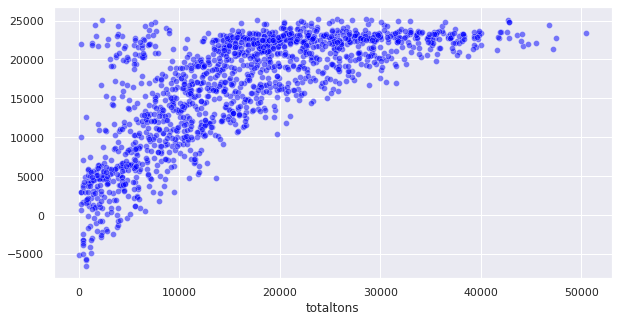

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


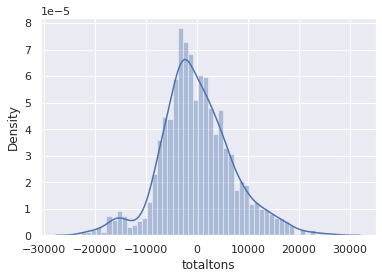

In [23]:
sns.distplot((y_test-y_pred),bins=50)

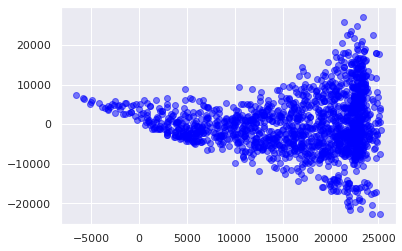

In [24]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [25]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.5087676648073538

In [26]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 50913896.16006359


#Regresión logística

Calculo Rendimiento

In [27]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    return ton/time

In [28]:
palas['rendimiento_efectivo'] = palas.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

In [29]:
palas['rendimiento_efectivo'].describe()

count    3819.000000
mean        0.615921
std         0.327523
min         0.000000
25%         0.443304
50%         0.586988
75%         0.806069
max        12.000000
Name: rendimiento_efectivo, dtype: float64

Diferenciamos Bueno o Malo segun el promedio de rendimiento

In [30]:
def check(valor):
  if valor >= 0.615921:
    return 1
  else:
    return 0

In [31]:
palas['rend_ef_bin'] = palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)

In [32]:
pd.DataFrame(palas.groupby(['rend_ef_bin']).count())

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
rend_ef_bin,,,,,,,,,,,,,,,
0,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
1,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752


In [33]:
turno = pd.get_dummies(palas['shift#'])

In [34]:
eqmtid = pd.get_dummies(palas['eqmtid'])

In [35]:
import datetime as dt

In [36]:
palas['shiftdate'] = pd.to_datetime(palas['shiftdate'])
palas['shiftdate'] = palas['shiftdate'].map(dt.datetime.toordinal)

In [37]:
# test shiftdate
train = pd.concat([palas.drop(['shift#','shiftindex','eqmtid','totaltons','tmcat01','rendimiento_efectivo'],axis=1),turno,eqmtid],axis=1)
# test shiftindex
#train = pd.concat([palas.drop(['shift#','shiftdate','eqmtid','totaltons','tmcat01','rendimiento_efectivo'],axis=1),turno,eqmtid],axis=1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 23 to 13629
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   shiftdate    3819 non-null   int64
 1   totaltime    3819 non-null   int64
 2   loadcnt      3819 non-null   int64
 3   tmcat02      3819 non-null   int64
 4   tmcat03      3819 non-null   int64
 5   tmcat04      3819 non-null   int64
 6   tmcat05      3819 non-null   int64
 7   tmcat06      3819 non-null   int64
 8   tmcat07      3819 non-null   int64
 9   rend_ef_bin  3819 non-null   int64
 10  1            3819 non-null   uint8
 11  2            3819 non-null   uint8
 12  026          3819 non-null   uint8
 13  029          3819 non-null   uint8
 14  030          3819 non-null   uint8
 15  210          3819 non-null   uint8
 16  211          3819 non-null   uint8
 17  212          3819 non-null   uint8
 18  213          3819 non-null   uint8
 19  305          3819 non-null   uint8
 20  306   

In [39]:
train.head(10)

,shiftdate,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rend_ef_bin,1,2,026,029,030,210,211,212,213,305,306,307,BUZON
23,737241,43200,157,0,814,3086,0,4132,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25,737241,43200,12,0,367,3466,33774,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
27,737241,43200,55,0,3972,4192,0,4161,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
28,737241,43200,54,0,10339,0,6049,1816,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
29,737241,43200,103,0,6108,0,0,1772,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
6,737241,43200,60,0,4935,0,0,1787,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,737241,43200,161,0,4166,0,0,3556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,737241,43200,128,0,3981,0,0,3524,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
10,737241,43200,33,0,8632,13462,0,1778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11,737241,43200,54,0,728,42472,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       633
           1       0.96      0.98      0.97       513

    accuracy                           0.97      1146
   macro avg       0.97      0.97      0.97      1146
weighted avg       0.97      0.97      0.97      1146



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[613,  20],
       [ 12, 501]])

In [60]:
import numpy as np

In [ ]:
plot_matriz(y_test,y_pred)

#Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier()

In [ ]:
modelo.fit(X_train,y_train)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [55]:
tree_to_png(modelo,train,'/tree.png')

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       633
           1       0.88      0.92      0.90       513

    accuracy                           0.91      1146
   macro avg       0.90      0.91      0.91      1146
weighted avg       0.91      0.91      0.91      1146



In [57]:
confusion_matrix(y_test,y_pred)

array([[566,  67],
       [ 41, 472]])

Accuracy: 0.9057591623036649
Precision: 0.87569573283859
Recall: 0.9200779727095516


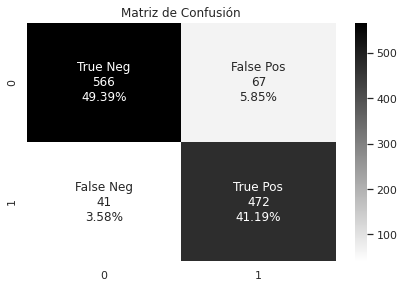

In [61]:
plot_matriz(y_test,y_pred)

Podar

In [ ]:
from sklearn.tree._tree import TREE_LEAF

In [ ]:
print(sum(modelo.tree_.children_left < 0))
# start pruning from the root
podar(modelo.tree_, 0, 5)
sum(modelo.tree_.children_left < 0)

In [ ]:
tree_to_png(modelo,train,'/tree_pod.png')

#Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
modelo = RandomForestClassifier(n_estimators=100)

In [65]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_pred = modelo.predict(X_test)

In [77]:
len(modelo.estimators_)

100

In [68]:
#modelo.estimators_
modelo.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1001760149, splitter='best')

In [79]:
for index in range(0, 5):
  name = '/tree_rf_' + str(index) + '.png'
  tree_to_png(modelo.estimators_[index],train,name)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       633
           1       0.91      0.93      0.92       513

    accuracy                           0.93      1146
   macro avg       0.93      0.93      0.93      1146
weighted avg       0.93      0.93      0.93      1146



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,y_pred)

array([[585,  48],
       [ 35, 478]])

Accuracy: 0.9275741710296684
Precision: 0.908745247148289
Recall: 0.9317738791423001


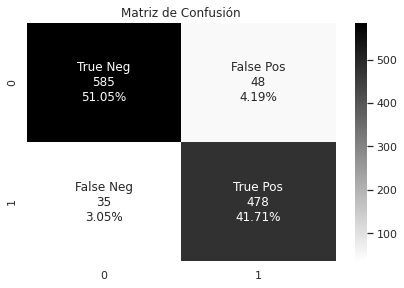

In [72]:
plot_matriz(y_test,y_pred)